# Develop ANN

In [1]:
import tensorflow as tf
import numpy as np
import mnist
import matplotlib.pyplot as plt
from utils import *

In [2]:

def create_model():
    model = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(28*28,)),
        tf.keras.layers.Dense(200, activation='relu'),
        tf.keras.layers.Dropout(0.15),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(60, activation='relu'),
        tf.keras.layers.Dropout(0.05),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    return model
model = create_model()
# print model layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               157000    
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 60)                6060      
                                                                 
 dropout_2 (Dropout)         (None, 60)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                6

# Using our own dataset

In [3]:
from sklearn.model_selection import train_test_split
X,y = get_data()
X = X.reshape(-1, 28*28)
train_digit,test_digit, train_label, test_label = train_test_split(X,y, test_size=0.1, random_state=42)
[tmp.shape for tmp in [train_digit, train_label,test_digit, test_label]]

[(992, 784), (992,), (111, 784), (111,)]

In [4]:
train_label = tf.one_hot(train_label,10)
test_label = tf.one_hot(test_label,10)

TRAIN_SIZE = len(train_digit)
EPOCHS = 10
steps_per_epoch = TRAIN_SIZE//EPOCHS
BATCH_SIZE  = TRAIN_SIZE//steps_per_epoch

print("Steps per epoch: ", steps_per_epoch)
history = model.fit(x = train_digit, y = train_label , steps_per_epoch=steps_per_epoch, epochs=EPOCHS,
                    validation_data=(test_digit, test_label), validation_steps=1)
model.save('saved_model/local_model')

Steps per epoch:  99
Epoch 1/10
99/99 [==============================] - 3s 10ms/step - loss: 19.9328 - accuracy: 0.3778 - val_loss: 4.2790 - val_accuracy: 0.6126
Epoch 2/10
99/99 [==============================] - 1s 7ms/step - loss: 4.9089 - accuracy: 0.6176 - val_loss: 3.7126 - val_accuracy: 0.6036
Epoch 3/10
99/99 [==============================] - 1s 6ms/step - loss: 3.4224 - accuracy: 0.6639 - val_loss: 2.3050 - val_accuracy: 0.6757
Epoch 4/10
99/99 [==============================] - 1s 7ms/step - loss: 2.2999 - accuracy: 0.7241 - val_loss: 1.4483 - val_accuracy: 0.7207
Epoch 5/10
99/99 [==============================] - 1s 6ms/step - loss: 1.3854 - accuracy: 0.7750 - val_loss: 1.2690 - val_accuracy: 0.7297
Epoch 6/10
99/99 [==============================] - 1s 5ms/step - loss: 1.1988 - accuracy: 0.7935 - val_loss: 1.1063 - val_accuracy: 0.8108
Epoch 7/10
99/99 [==============================] - 1s 7ms/step - loss: 1.2444 - accuracy: 0.8213 - val_loss: 1.0376 - val_accuracy: 0.80

99/99 [==============================] - 2s 21ms/step - loss: 0.8022 - accuracy: 0.8350 - val_loss: 0.9378 - val_accuracy: 0.8018


INFO:tensorflow:Assets written to: saved_model/local_model\assets


INFO:tensorflow:Assets written to: saved_model/local_model\assets


31/31 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       100
           1       0.96      0.96      0.96        50
           2       0.98      0.99      0.98        97
           3       0.95      0.94      0.94       114
           4       0.98      0.99      0.99       102
           5       0.95      0.93      0.94       103
           6       0.92      0.98      0.95       102
           7       0.95      0.99      0.97       126
           8       0.97      0.87      0.91        99
           9       0.95      0.93      0.94        99

    accuracy                           0.96       992
   macro avg       0.96      0.96      0.96       992
weighted avg       0.96      0.96      0.96       992

4/4 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.00      1.00      0.00       0.0
           1       0.00     

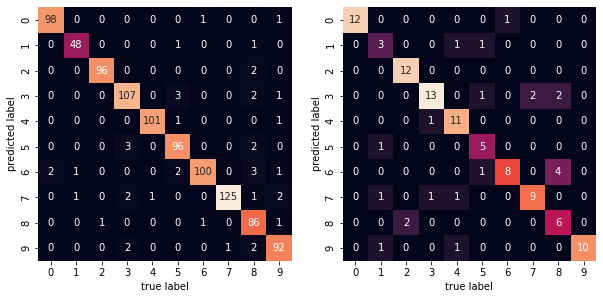

In [10]:
from sklearn.metrics import classification_report
_, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(10,5))

pred = inverse_one_hot(model.predict(train_digit))
report = classification_report(inverse_one_hot(train_label), pred, zero_division=1)
print(report)
plot_confusion_matrix(inverse_one_hot(train_label), pred, axs[0])

pred = inverse_one_hot(model.predict(test_digit))
report = classification_report(inverse_one_hot(test_digit), pred, zero_division=1)
print(report)
plot_confusion_matrix(inverse_one_hot(test_label), pred, axs[1])

# MNIST

In [ ]:
RUN_MNIST = False
if RUN_MNIST:
    model = create_model()
    train_digit, train_label = mnist.extract_train()
    test_digit, test_label = mnist.extract_test()
    train_digit = train_digit.reshape(-1,28*28)
    test_digit = test_digit.reshape(-1,28*28)

    train_label = tf.one_hot(train_label, 10)
    test_label = tf.one_hot(test_label, 10)
    print([tmp.shape for tmp in [train_digit, train_label, test_digit, test_label]])

    TRAIN_SIZE = len(train_digit)
    BATCH_SIZE = 128
    EPOCHS = 10
    steps_per_epoch = TRAIN_SIZE//BATCH_SIZE  # 60,000 items in this dataset


    print("Steps per epoch: ", steps_per_epoch)
    history = model.fit(x = train_digit, y = train_label , steps_per_epoch=steps_per_epoch, 
                        epochs=EPOCHS,
                        validation_data=(test_digit, test_label), validation_steps=1)
    model.save('saved_model/googler_model')

35/35 [==============================] - 0s 3ms/step


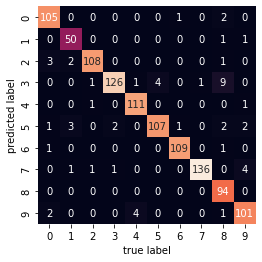

In [ ]:
digits, labels = get_data()
digits = digits.reshape(-1,28*28)

pred = model.predict(digits)
pred = inverse_one_hot(pred)

res = pred == labels
acc = res[res].sum() / res.shape[0] * 100
print(acc)
plot_confusion_matrix(labels, pred)

313/313 [==============================] - 1s 2ms/step


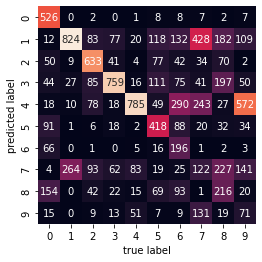

In [ ]:
digits, labels = mnist.extract_test()
digits = digits.reshape(-1,28*28)

pred = model.predict(digits)
pred = inverse_one_hot(pred)

res = pred == labels
acc = res[res].sum() / res.shape[0] * 100
acc
plot_confusion_matrix(labels, pred)